In [150]:
import pandas as pd
import numpy as np 
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_path = Path().absolute().parent/'data'
geo_info = pd.read_csv(data_path/'geo_info.csv', sep=';')
referer_vectors = pd.read_csv(data_path/'referer_vectors.csv', sep=';')
test = pd.read_csv(data_path/'test.csv', sep=';')
test_users = pd.read_csv(data_path/'test_users.csv', sep=';')
train = pd.read_csv(data_path/'train.csv', sep=';')
train_labels = pd.read_csv(data_path/'train_labels.csv', sep=';')

In [152]:
#объединим данные
train = pd.merge(train, geo_info, on='geo_id')
train = pd.merge(train, referer_vectors, on='referer')
train = pd.merge(train, train_labels, on='user_id')

In [153]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601290 entries, 0 to 601289
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   request_ts   601290 non-null  int64 
 1   user_id      601290 non-null  object
 2   referer      601290 non-null  object
 3   geo_id       601290 non-null  int64 
 4   user_agent   601289 non-null  object
 5   country_id   601290 non-null  object
 6   region_id    550670 non-null  object
 7   timezone_id  601290 non-null  object
 8   component0   601290 non-null  int64 
 9   component1   601290 non-null  int64 
 10  component2   601290 non-null  int64 
 11  component3   601290 non-null  int64 
 12  component4   601290 non-null  int64 
 13  component5   601290 non-null  int64 
 14  component6   601290 non-null  int64 
 15  component7   601290 non-null  int64 
 16  component8   601290 non-null  int64 
 17  component9   601290 non-null  int64 
 18  target       601290 non-null  int64 
dtypes:

In [154]:
print(train.sample(5))

        request_ts                           user_id  \
223511  1700991357  f901e312030913153a5a982ce6ca5312   
487443  1700974080  3dcde6013d0c6f65c5280e17245999b3   
446571  1701013483  7e2309bea9a91dafb8d3657d16480a7c   
590854  1701011093  b63b9dcdf4d9dfad934a75c6977b1b38   
472038  1701012057  e64e97472f6aa289478d4ca5bfd583e8   

                         referer  geo_id  \
223511  https://7b8d3ae/15724322    9371   
487443  https://710604b/16966a23    2828   
446571          https://65da82a/    3663   
590854  https://a63e6f0/15bf0a23    1462   
472038  https://a140f13/144027af    8864   

                                               user_agent country_id  \
223511  {'browser': 'Chrome Mobile', 'browser_version'...     c31b4e   
487443  {'browser': 'Chrome Mobile WebView', 'browser_...     c31b4e   
446571  {'browser': 'Yandex Browser', 'browser_version...     c31b4e   
590854  {'browser': 'Chrome Mobile', 'browser_version'...    1234f1d   
472038  {'browser': 'Chrome Mobile', '

In [155]:
#удаляем дубликаты и пропуски
print('Количество дубликатов:', train.duplicated().sum())
train = train.drop_duplicates()
print('Кол-во пропусков:\n', train.isnull().sum())
train = train.dropna(axis=0, how='any')

Количество дубликатов: 9454
Кол-во пропусков:
 request_ts         0
user_id            0
referer            0
geo_id             0
user_agent         1
country_id         0
region_id      49903
timezone_id        0
component0         0
component1         0
component2         0
component3         0
component4         0
component5         0
component6         0
component7         0
component8         0
component9         0
target             0
dtype: int64


In [156]:
# проверим таргет на дисбаланс классов
train['target'].value_counts()

target
0    286093
1    255839
Name: count, dtype: int64

Классы в данных сбалансированы

Наибольший интерес в данных представляют компоненты 0-9, но поскольку они имеют большой разброс и их никак нельзя интерпретировать, рассмотрим распределение географических признаков и признаков, отвечающих за используемые среды для просмотра рекламы

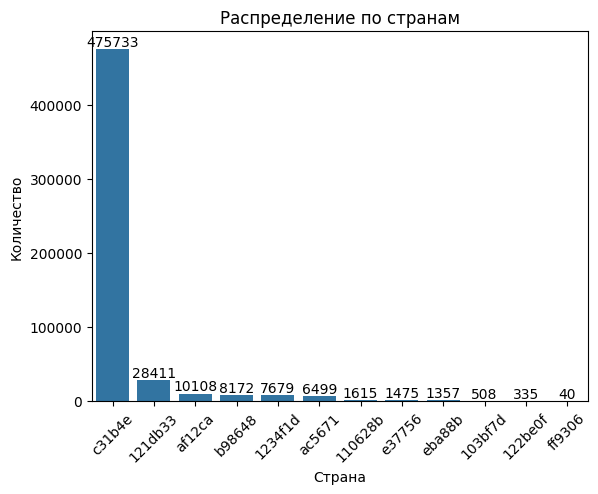

In [157]:
# рассмотрим расспреление по странам
plt.figure()
fig = sns.barplot(data =train['country_id'].value_counts())
plt.title('Распределение по странам')
plt.xticks(rotation=45)
plt.xlabel('Страна')
plt.ylabel('Количество')
plt.bar_label(fig.containers[0])
plt.show()

Больше всего пользователей из страны c id=с31b4e

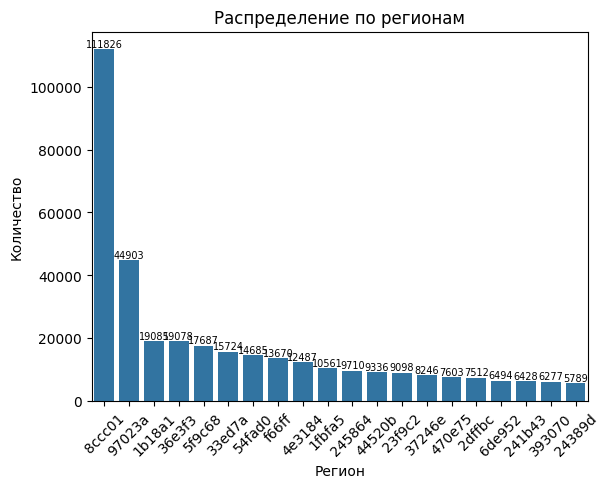

In [158]:
# рассмотрим расспреление по регионам
plt.figure()
fig = sns.barplot(data =train['region_id'].value_counts()[0:20])
plt.title('Распределение по регионам')
plt.xticks(rotation=45)
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.bar_label(fig.containers[0], fontsize=7)
plt.show()

Больше всего пользователей из региона c id=8ccc01

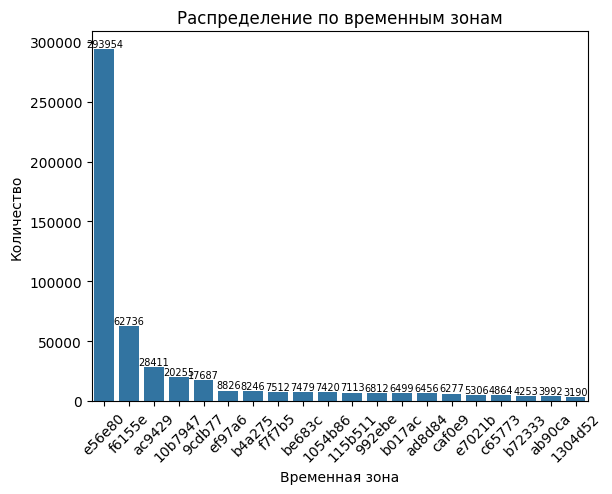

In [159]:
# рассмотрим расспределение по временным зонам
plt.figure()
fig = sns.barplot(data =train['timezone_id'].value_counts()[0:20])
plt.title('Распределение по временным зонам')
plt.xticks(rotation=45)
plt.xlabel('Временная зона')
plt.ylabel('Количество')
plt.bar_label(fig.containers[0], fontsize=7)
plt.show()

In [160]:
train[train['timezone_id']=='e56e80']['country_id'].value_counts()

country_id
c31b4e    293954
Name: count, dtype: int64

In [161]:
train[train['timezone_id']=='e56e80']['region_id'].value_counts()

region_id
8ccc01    111826
97023a     44903
1b18a1     19085
54fad0     14685
1fbfa5     10561
245864      9710
44520b      9336
24389d      5789
7e6fa2      4275
380ef0      4241
6398c6      3678
28d2d6      3452
4a7606      3323
7bb66a      3225
8beef1      2820
52b73e      2809
607a45      2753
6dbc37      2600
861907      2529
44be29      2519
8f242c      2508
978f9b      2365
7ccd2c      2117
8bd341      2077
200d3c      2035
3c9dca      1932
626fb3      1819
1326d0      1694
71cac2      1619
786893      1513
7f70c5      1492
11704d      1429
659569      1189
501fb0      1185
229b54      1166
61050e      1138
325fef       801
221ceb       759
1943cd       360
6eb017       321
887d39       173
4b9ad7        79
7c6a57        64
Name: count, dtype: int64

Больше все пользователей из временной зоны с id=e56e80, что соответствует одной стране (id=c31b4e), но разным регионам

In [162]:
# рассмотрим использование различных браузеров
train['user_agent_browser'] = train['user_agent'].apply(
    lambda x: eval(x).get('browser') if isinstance(x, str) else None)

train['user_agent_browser'].unique()

array(['Chrome Mobile', 'Yandex Browser', 'Chrome',
       'Chrome Mobile WebView', 'Edge', 'Opera', 'MiuiBrowser',
       'Samsung Internet', 'Chrome Mobile iOS', 'Mobile Safari',
       'YandexSearch', 'Opera Mobile', 'Google', 'Firefox', 'Chromium',
       'Mobile Safari UI/WKWebView', 'Edge Mobile', 'Safari',
       'Firefox Mobile', 'Mail.ru Chromium Browser', 'Facebook', 'Iron',
       'Mint Browser', 'Instagram', 'Opera Mini', 'Bytespider',
       'HeadlessChrome', 'Amazon Silk', 'Seznam prohlížeč', 'IE',
       'UC Browser', 'Maxthon', 'Pinterest', 'YandexModule2', 'Phantom',
       'IE Mobile', 'Electron', 'Android', 'Flipboard', 'Bot', 'Puffin',
       'Firefox iOS', 'Opera Coast', 'Pale Moon', 'Dragon', 'Apple Mail',
       'Other', 'Flipboard-Briefing', 'Waterfox', 'SeaMonkey',
       'DuckDuckGo Mobile', 'WebKit Nightly', 'Vivaldi', 'Whale',
       'Basilisk'], dtype=object)

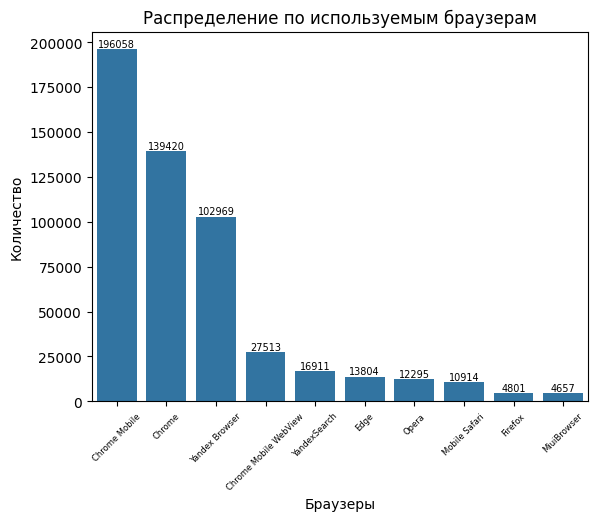

In [163]:
plt.figure()
fig = sns.barplot(data =train['user_agent_browser'].value_counts()[0:10])
plt.title('Распределение по используемым браузерам')
plt.xticks(rotation=45, fontsize=6)
plt.xlabel('Браузеры')
plt.ylabel('Количество')
plt.bar_label(fig.containers[0], fontsize=7)
plt.show()

Топ 3 браузеров:

Chrome mobile

Chrome

Yandex Browser

In [164]:
# рассмотрим использование операционных систем
train['user_agent_os'] = train['user_agent'].apply(
    lambda x: eval(x).get('os') if isinstance(x, str) else None)
train['user_agent_os'].unique()

array(['Android', 'Windows', 'Linux', 'Mac OS X', 'iOS', 'Tizen',
       'Chrome OS', 'Windows Phone', 'Ubuntu', 'Other', 'FreeBSD',
       'Chromecast', 'Fedora'], dtype=object)

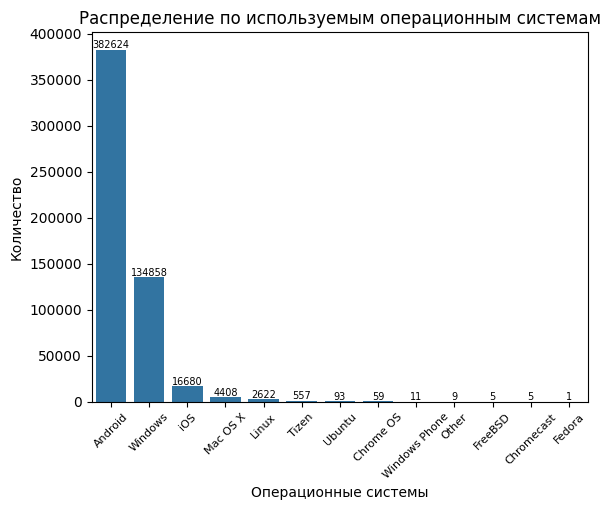

In [165]:
plt.figure()
fig = sns.barplot(data =train['user_agent_os'].value_counts())
plt.title('Распределение по используемым операционным системам')
plt.xticks(rotation=45, fontsize=8)
plt.xlabel('Операционные системы')
plt.ylabel('Количество')
plt.bar_label(fig.containers[0], fontsize=7)
plt.show()

Топ 3 операционные системы:

Android

Windows

IOS